In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime


import matplotlib.patches as patches

from matplotlib import rc
from matplotlib import cm
rc('text', usetex=True)

# Load data from Figure 4 of White et al. 2020 

In [2]:
df = pd.read_csv("Data_White.csv")

df["X_S_E"] = np.round(df["X_S_E"], 0)
df["X_I"] = np.round(df["X_I"], 0)
df["X_R"] = np.round(df["X_R"], 0)

df["Y_R"][df["Y_R"] < 0] = 0.0 

df

,X_S_E,Y_S_E,X_I,Y_I,X_R,Y_R
0,4.0,9.710366e-01,4.0,0.030488,4.0,0.000000
1,5.0,7.134146e-01,5.0,0.286543,5.0,0.002131
2,5.0,6.707317e-01,5.0,0.329946,5.0,0.002131
3,5.0,6.006098e-01,6.0,0.418869,5.0,0.002131
4,5.0,5.487805e-01,5.0,0.398755,5.0,0.002131
5,5.0,5.167683e-01,5.0,0.449568,6.0,0.001249
6,5.0,5.076220e-01,5.0,0.482385,6.0,0.001249
7,6.0,5.807927e-01,5.0,0.491912,6.0,0.001249
8,6.0,4.512195e-01,6.0,0.548018,6.0,0.001249
9,6.0,3.780488e-01,6.0,0.597773,6.0,0.010071


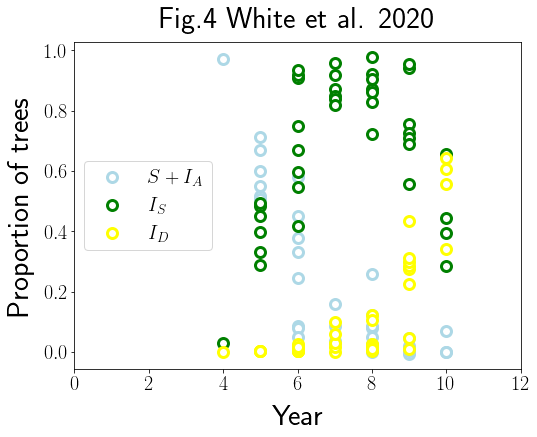

In [3]:
plt.figure(figsize=(8,6))

plt.scatter(df["X_S_E"], df["Y_S_E"], color="lightblue", facecolor="w", lw=3, s=100, label=r"$S+I_A$")
plt.scatter(df["X_I"], df["Y_I"], color="green", facecolor="w", lw=3, s=100, label=r"$I_S$")
plt.scatter(df["X_R"], df["Y_R"], color="yellow", facecolor="w", lw=3, s=100, label=r"$I_D$")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(0, 12)

plt.ylabel("Proportion of trees", fontsize=30, labelpad=10)
plt.xlabel("Year", fontsize=30, labelpad=10)

plt.title("Fig.4 White et al. 2020", fontsize=30, pad=15)

plt.legend(fontsize=20, loc="center left")

# Process data

In [4]:
years = np.arange(0, 13, 1)

S_E = []
I = []
R = []

S_E_err = []
I_err = []
R_err = []

for i in range(len(years)):
    
    S_E.append(df[df["X_S_E"] == years[i]]["Y_S_E"].mean())
    I.append(df[df["X_I"] == years[i]]["Y_I"].mean())
    R.append(df[df["X_R"] == years[i]]["Y_R"].mean())
    
    S_E_err.append(df[df["X_S_E"] == years[i]]["Y_S_E"].std())
    I_err.append(df[df["X_I"] == years[i]]["Y_I"].std())
    R_err.append(df[df["X_R"] == years[i]]["Y_R"].std())
    
S_E = np.array(S_E)
I = np.array(I)
R = np.array(R)

S_E_err = np.array(S_E_err)
I_err = np.array(I_err)
R_err = np.array(R_err)

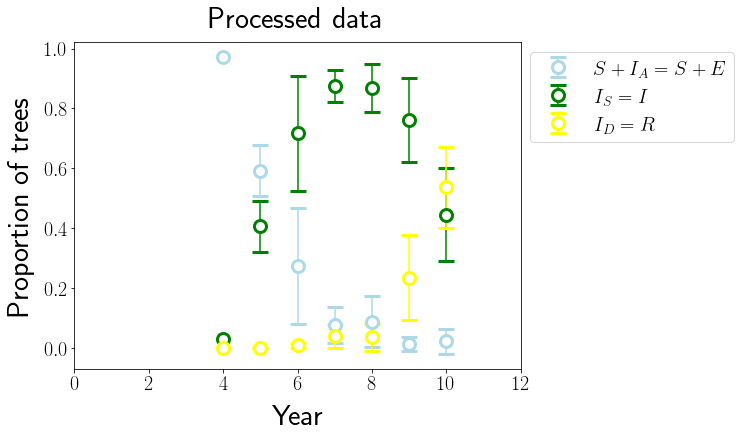

In [5]:
plt.figure(figsize=(8,6))

plotline, caps, barlinecols = plt.errorbar(years, S_E, yerr=S_E_err, color="lightblue", ls="", marker="o", ms=12, markerfacecolor="w", 
             markeredgewidth=3, capsize=8, label=r"$S+I_A=S+E$")

plt.errorbar(years, I, yerr=I_err, color="green", ls="", marker="o", ms=12, markerfacecolor="w", 
             markeredgewidth=3, capsize=8, label=r"$I_S=I$")
plt.errorbar(years, R, yerr=R_err, color="yellow", ls="", marker="o", ms=12, markerfacecolor="w",
            markeredgewidth=3, capsize=8, label=r"$I_D=R$")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(0, 12)

plt.ylabel("Proportion of trees", fontsize=30, labelpad=10)
plt.xlabel("Year", fontsize=30, labelpad=10)

plt.title("Processed data", fontsize=30, pad=15)

plt.legend(fontsize=20, loc="upper right", bbox_to_anchor=(1.5, 1))

In [6]:
df_new = pd.DataFrame({'Years':years, 'S_E':S_E, 'I':I, 'R':R, 'S_E_err':S_E_err, 'I_err':I_err,
                       'R_err':R_err})

df_new

df_new.to_csv("OQDS_data.csv")

# Further processing 

In [7]:
#I+R cannot be greater than 1.0, include this constrain in the errors
I_R = I + R

I_R_err_lower = I_err + R_err
I_R_err_upper = I_err + R_err

upper_I_R = I_R + I_R_err_upper

excess_I_R = 1.0 - upper_I_R

for i in range(len(excess_I_R)):
    
    if excess_I_R[i] < 0:
    
        I_R_err_upper[i] = I_R_err_upper[i] + excess_I_R[i]
        
I_R_err = [I_R_err_lower, I_R_err_upper]

#S+E cannot be lower than 0.0, include this constrain in the errors
S_E_err_lower = S_E_err
S_E_err_upper = S_E_err

lower_S_E = S_E - S_E_err_lower

excess_S_E = lower_S_E

for i in range(len(excess_S_E)):
    
    if excess_S_E[i] < 0:
    
        S_E_err_lower[i] = S_E_err_lower[i] + excess_S_E[i]
        
S_E_err = [S_E_err_lower, S_E_err_upper]


/home/alex/.conda/envs/Xylella/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/alex/.conda/envs/Xylella/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/home/alex/.conda/envs/Xylella/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/alex/.conda/envs/Xylella/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


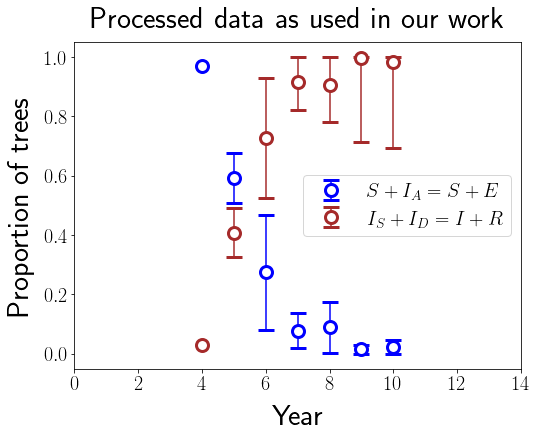

In [8]:
plt.figure(figsize=(8,6))

plt.errorbar(years, S_E, yerr=S_E_err, color="blue", ls="", marker="o", ms=12, markerfacecolor="w", 
             markeredgewidth=3, capsize=8, label=r"$S+I_A=S+E$")

plt.errorbar(years, I_R, yerr=I_R_err, color="brown",  ls="", marker="o", ms=12, markerfacecolor="w", 
             markeredgewidth=3, capsize=8, label=r"$I_S+I_D=I+R$")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(0, 14)

plt.ylabel("Proportion of trees", fontsize=30, labelpad=10)
plt.xlabel("Year", fontsize=30, labelpad=10)

plt.title("Processed data as used in our work", fontsize=30, pad=15)

plt.legend(fontsize=20, loc="center right")